# Selenium with Chrome

First up you'll need to download and install the chrome webdriver from here: http://chromedriver.chromium.org/downloads this will allow you to interact with chrome via python code.

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

You can set some options to make the 'browser' behave in a way you specify. You can find a comprehensive list of available options here: https://peter.sh/experiments/chromium-command-line-switches/


In [2]:
# Establish the options for Chrome
chrome_options = Options()                               # instantiate chrome options
chrome_options.add_argument("--headless")                # set chrome to be headless (won't show you the process)
chrome_options.add_argument("--window-size=1660x1080")   # set the size of your browser window
chrome_driver = '/Users/Tim/Documents/chromedriver'

Once you have set your options, you'll then create a browser instance to get a page, and then you can interact with the page. You'll find a good list of what you can do here: https://www.seleniumhq.org/docs/02_selenium_ide.jsp#commonly-used-selenium-commands. Basically if you can perform an action in person, you can perform the action in selenium - think form filling, button pressing, searching...

In [3]:
# instantiate the web driver
driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=chrome_driver) 

# get a page
driver.get('https://adioso.com/uk/london-uk-to-barcelona-es-return-october-2');

# take a screenshot of page as it has loaded
driver.get_screenshot_as_file("adioso_start.png",)

# find an element whose class is "close_button"
dismiss = driver.find_element_by_class_name('close_button')                             

# simulate a click interaction with the "close_button"
dismiss.click()

# wait 0.5 seconds as the close button starts an animation - we don't want to capture the animation
time.sleep(0.5)

# save a screenshot of the page in its state now
driver.get_screenshot_as_file("adioso_closed.png",)

# save the current html of the page
text = driver.page_source

# quit the driver
driver.quit()

We can look at the images we saved both before and after the 'click' to see what action we performed (closing the top banner)

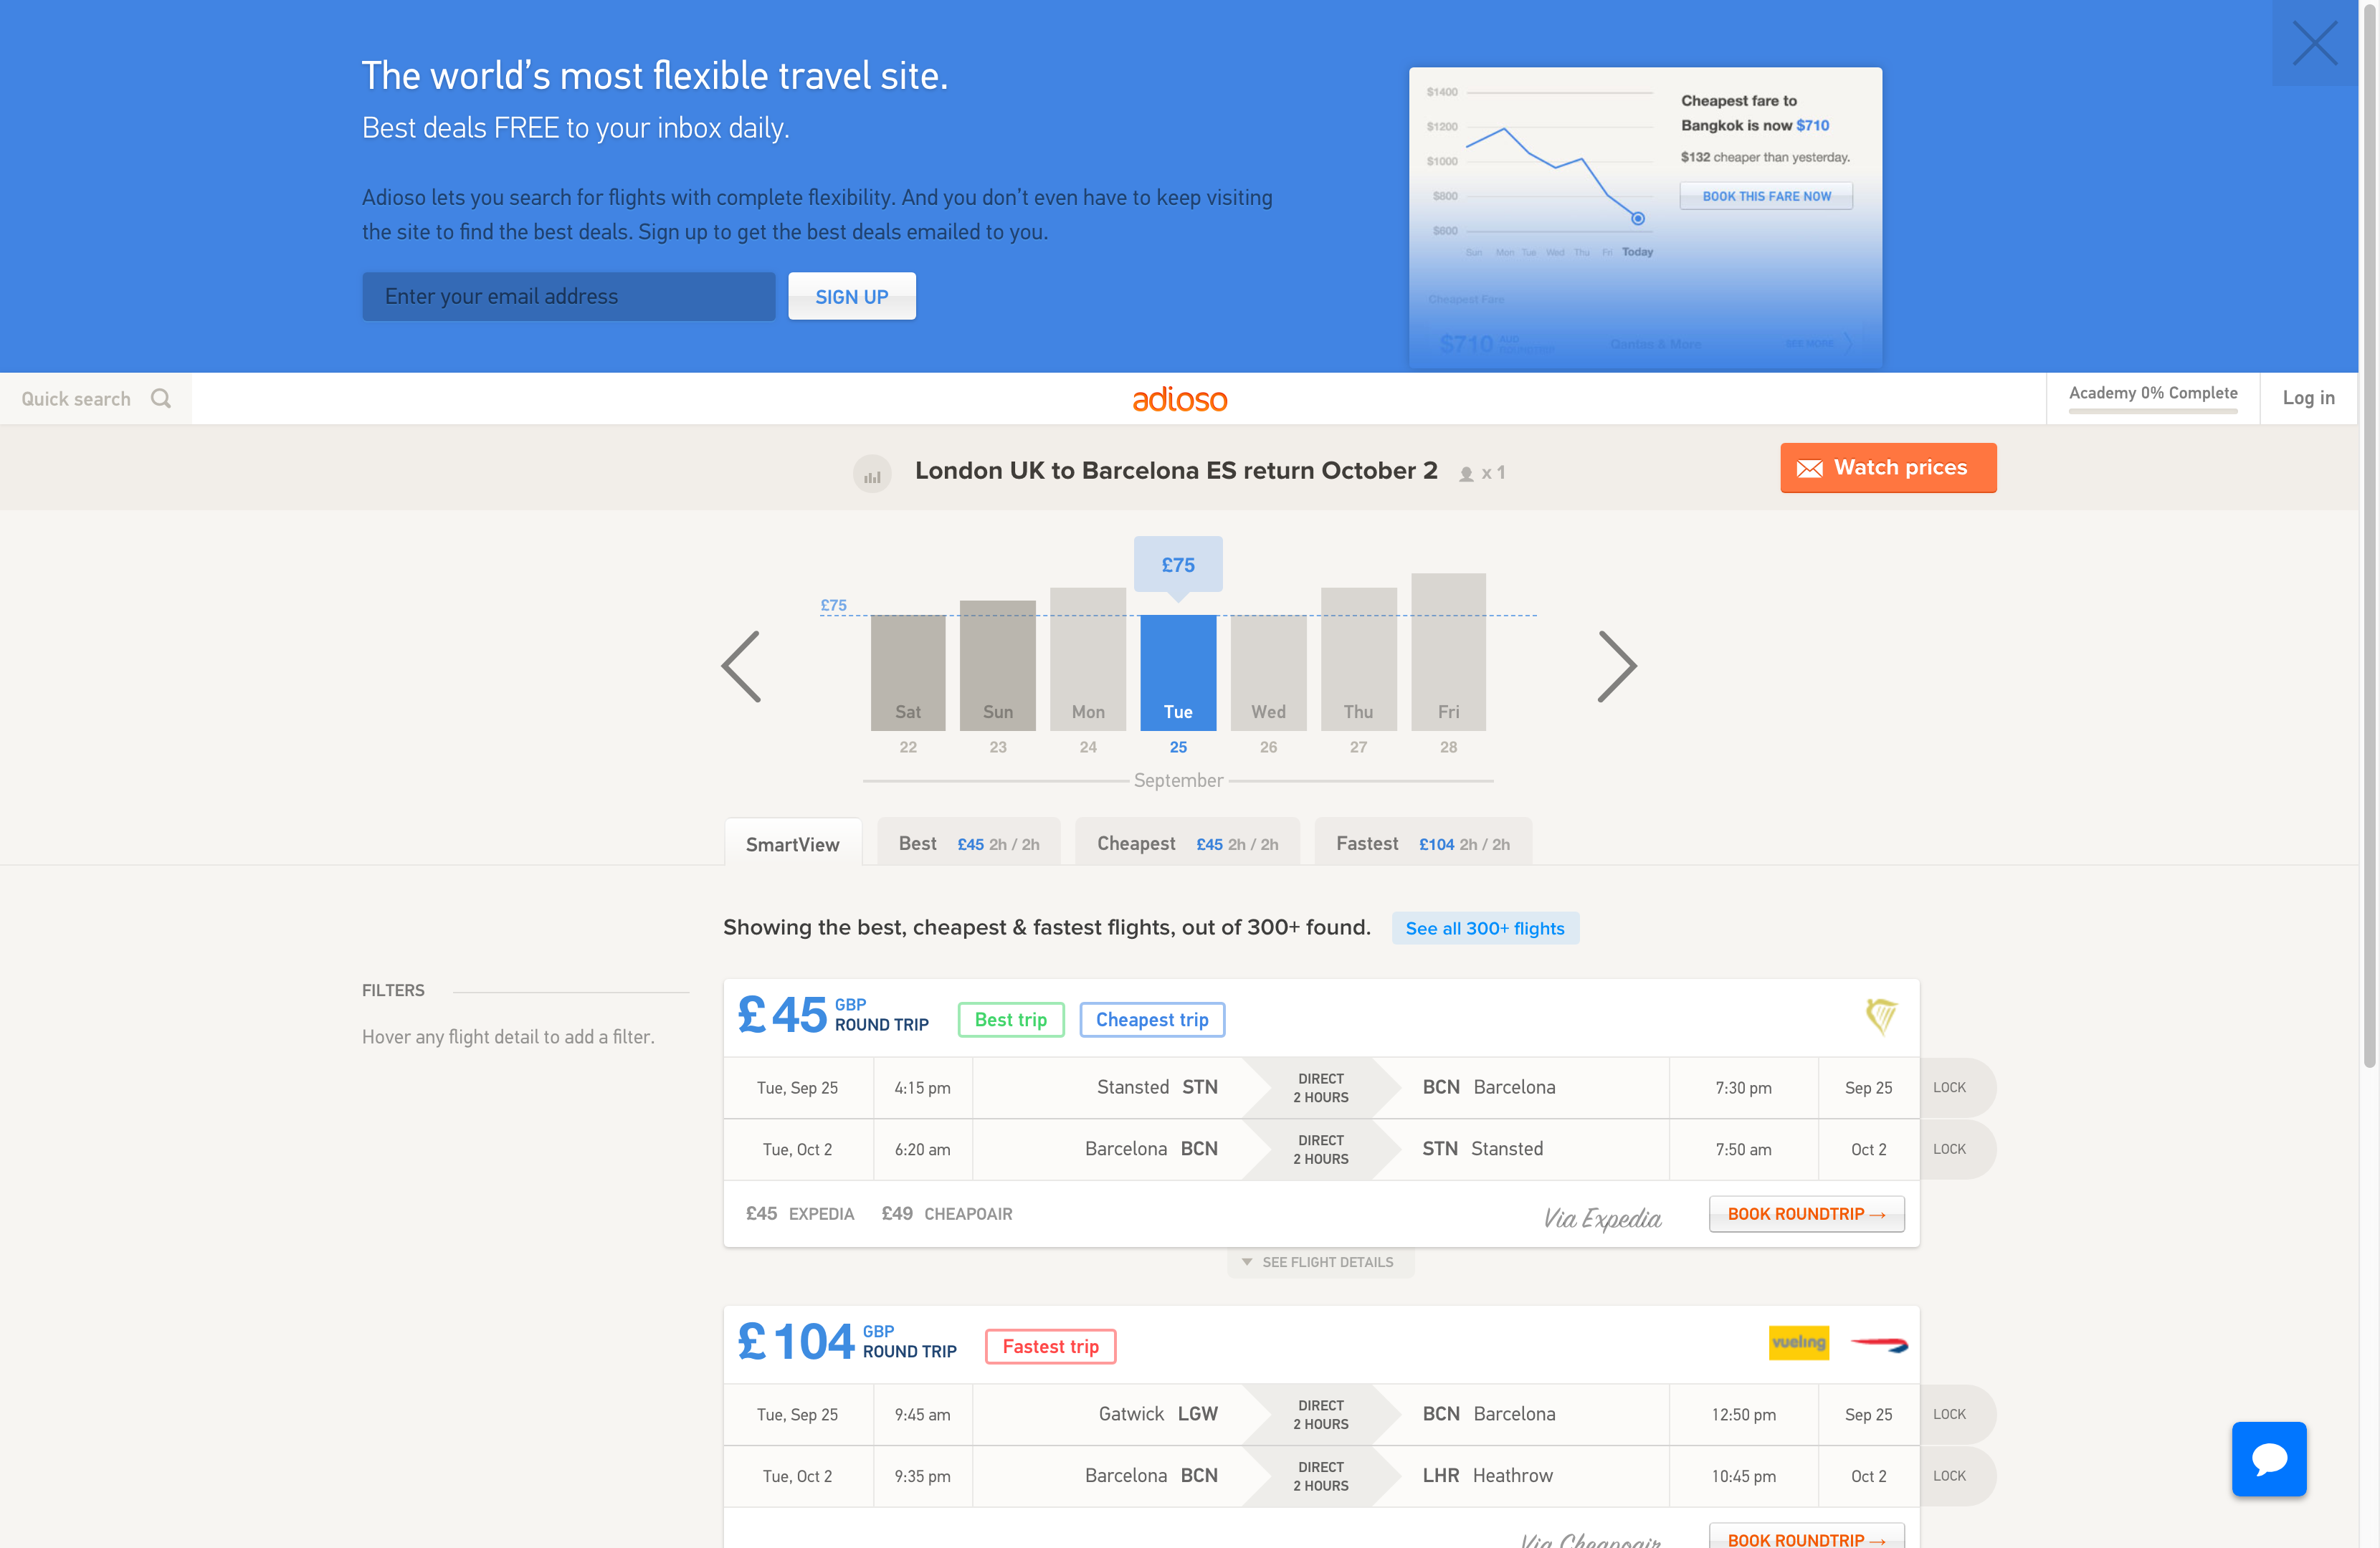

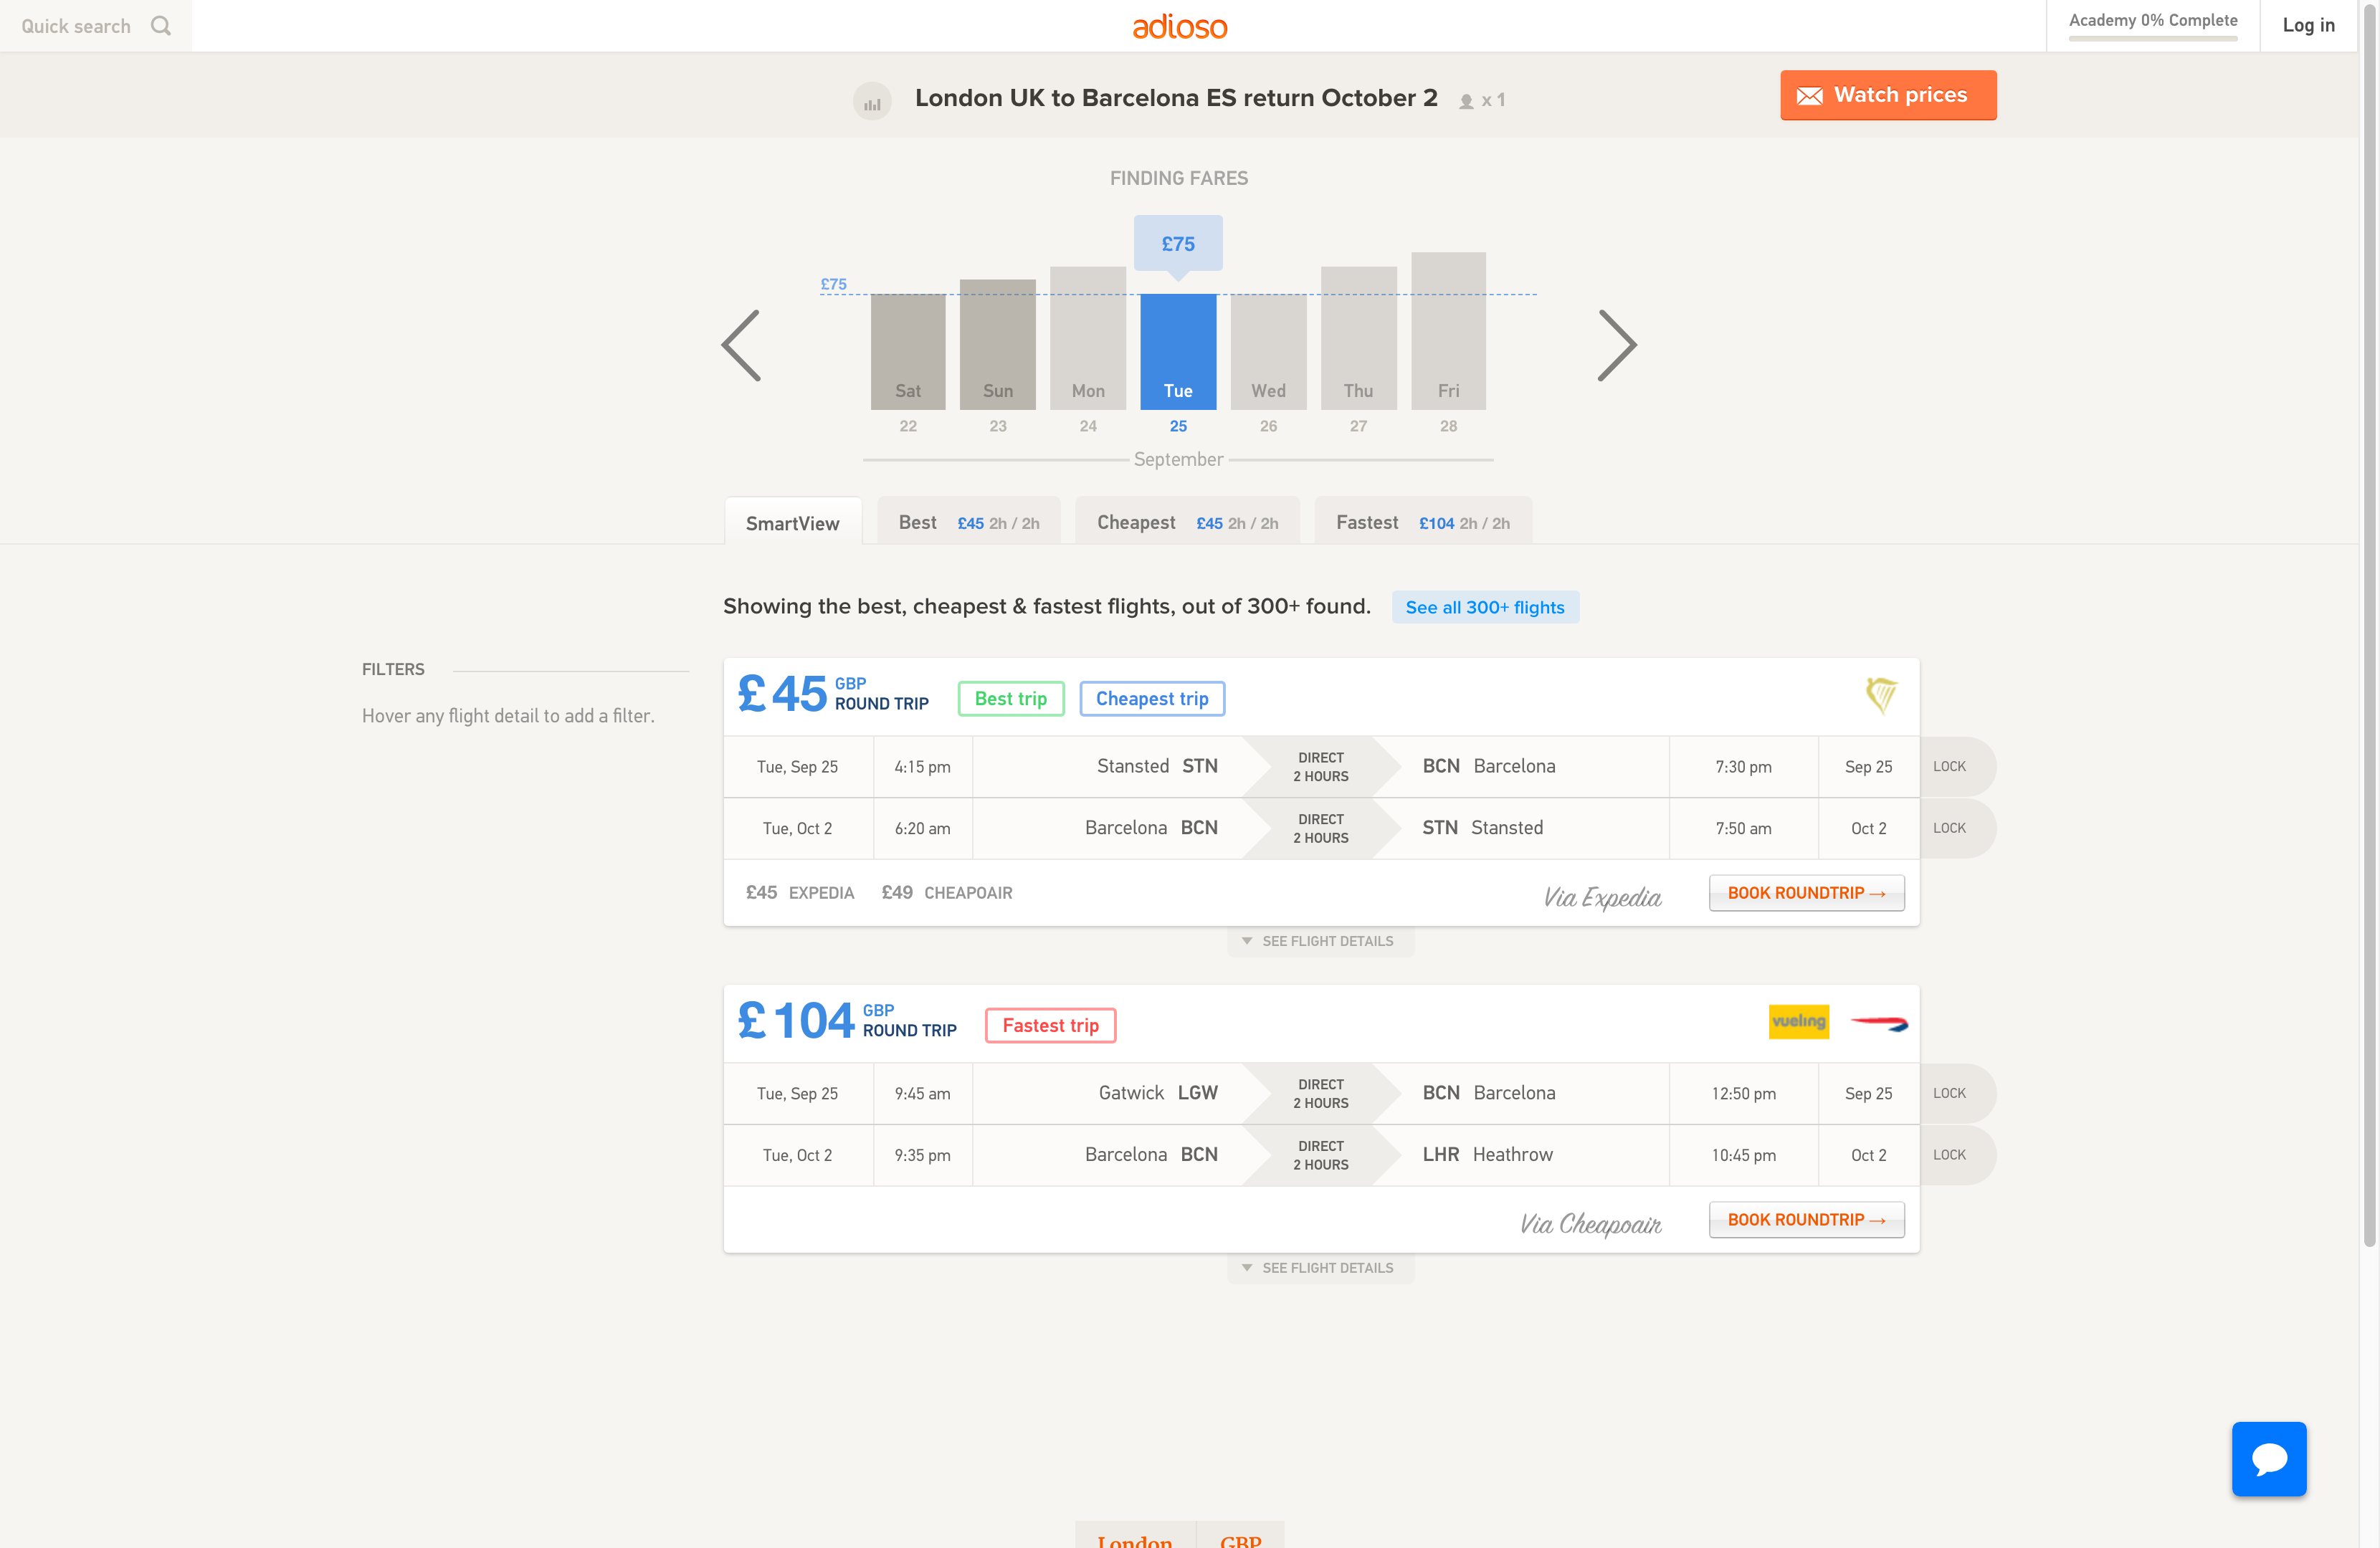

you have the source html saved in the `text` variable now - so you can then perform the same parsibng with Beautiful Soup as you have used before:


In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(text,'html.parser')

In [ ]:
print(soup.prettify())